KHAI BÁO THƯ VIỆN

In [37]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
random_seed = 1

### Phân cụm

#### Hàm vẽ đồ thị tìm Elbow point - số cụm tối ưu

In [38]:
def find_k_means(X):
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=random_seed)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(10, 5))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.grid(True)
    plt.show()

#### Đọc dữ liệu file train

In [21]:
data = pd.read_csv('FE_data_train.csv')
X = data.copy()

#### Vẽ đồ thị và chọn k tối ưu

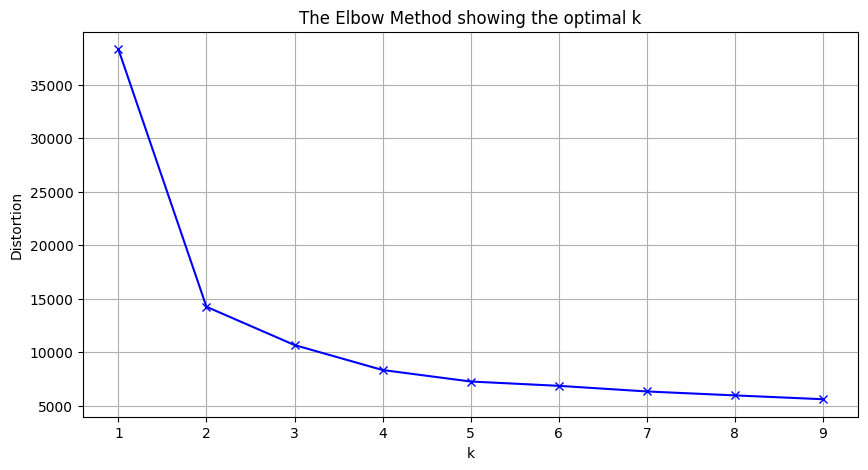

In [22]:
find_k_means(X)

#### Sử dụng K means để phân cụm

In [23]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=random_seed)
kmeans.fit(X)
clusters = kmeans.predict(X)
# Clustering Resutls
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = clusters
data_with_clusters

,Khu vực,Mô tả vị trí,Diện tích (m^2),Mặt tiền (m),Số phòng ngủ,WC,Giá nhà (Tỷ),Clusters
0,1.372468,0.573959,0.226570,-0.291449,-0.070519,-0.711859,7.40,1
1,1.372468,-1.555137,1.852398,1.650472,-0.070519,0.171784,0.07,0
2,1.372468,-1.555137,1.852398,1.650472,1.908858,2.293030,0.07,0
3,-1.519977,-0.439103,0.226570,-0.291449,0.840833,0.855878,5.80,1
4,-1.193834,-0.439103,-0.222668,-0.291449,-0.070519,-0.711859,5.90,1
...,...,...,...,...,...,...,...,...
1236,0.764265,0.573959,-1.122732,-0.291449,-1.249523,-0.711859,3.15,0
1237,1.372468,0.573959,0.000210,-0.291449,-1.249523,-0.711859,4.60,1
1238,-1.519977,-0.948317,-0.838683,-1.041276,-0.070519,0.171784,3.35,0
1239,-1.519977,0.573959,-0.121132,-0.291449,-1.249523,-0.711859,3.99,0


#### Mapping các cụm với tên khoảng giá cụ thể

In [24]:
mapping_to_label = {
    0: "Thấp",
    1: "Trung Bình",
    3: "Cao",
    2: "Rất Cao",
}
data_with_clusters['Phân khúc giá'] = [mapping_to_label[number] for number in data_with_clusters['Clusters']]

#### Hiển thị các giá nhà Min-Max của mỗi cụm

In [25]:
mapping_clusters = []
for i in range(4):
    data = data_with_clusters[data_with_clusters['Clusters'] == i]['Giá nhà (Tỷ)']
    min = data.min()
    max = data.max()
    mapping_clusters.append([str(i), min, max, data.shape[0]])
pd.DataFrame(mapping_clusters, columns=["Cụm", "Min", "Max", "Count"]).sort_values('Min')

,Cụm,Min,Max,Count
0,0,0.0048,5.0,607
1,1,3.6300,9.2,399
3,3,9.0000,16.5,170
2,2,17.0000,25.0,65


#### Biểu đồ boxplot theo phân khúc giá

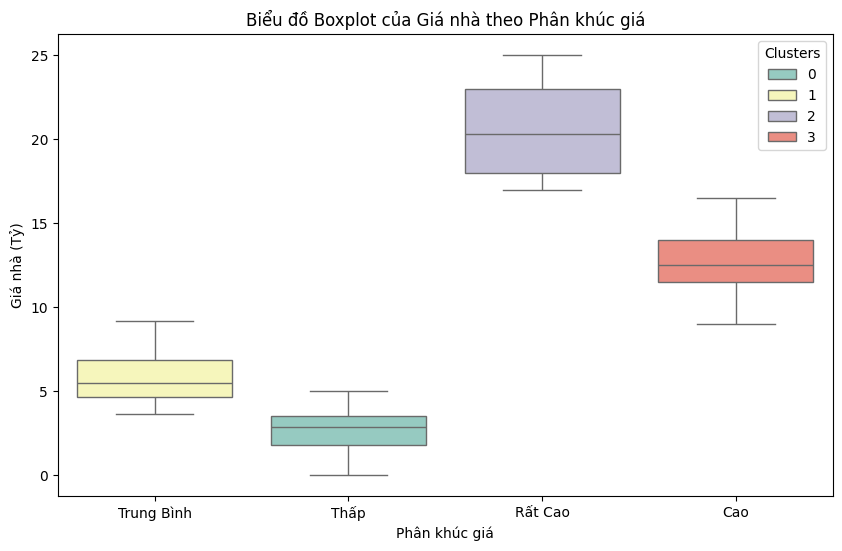

In [26]:
def box(data_with_clusters):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Phân khúc giá', y='Giá nhà (Tỷ)', data=data_with_clusters, hue='Clusters', palette='Set3')
    plt.title('Biểu đồ Boxplot của Giá nhà theo Phân khúc giá')
    plt.xlabel('Phân khúc giá')
    plt.ylabel('Giá nhà (Tỷ)')
    plt.show()
box(data_with_clusters)

### Chọn phân khúc giá

#### Khảo sát phân khúc giá Thấp - Trung bình

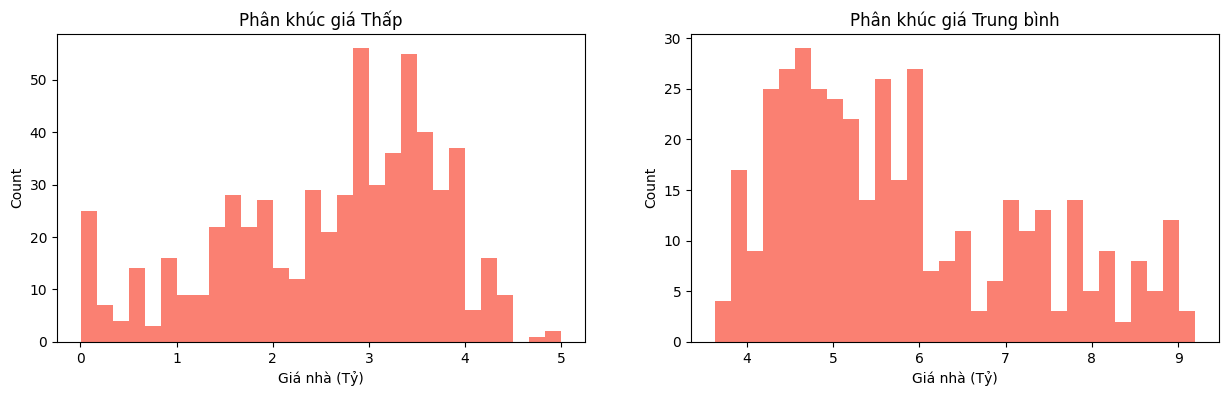

In [27]:
plt.figure(figsize=(15, 4))

check1 = data_with_clusters[data_with_clusters['Clusters'] == 0]
plt.subplot(1,2,1)
plt.hist(check1['Giá nhà (Tỷ)'], bins=30, color='salmon')
plt.xlabel('Giá nhà (Tỷ)')
plt.ylabel("Count")
plt.title("Phân khúc giá Thấp")

plt.subplot(1,2,2)
check2 = data_with_clusters[data_with_clusters['Clusters'] == 1]
plt.hist(check2['Giá nhà (Tỷ)'], bins=30, color='salmon')
plt.xlabel('Giá nhà (Tỷ)')
plt.ylabel("Count")
plt.title("Phân khúc giá Trung bình")
plt.show()

Thử các mốc giá từ 4-4.5 để chọn phân khúc giá phù hợp

In [28]:
rs = []
for i in np.arange(4, 4.6, 0.1):
    c1 = check1[check1['Giá nhà (Tỷ)'] > i].shape[0]
    c2 = check2[check2['Giá nhà (Tỷ)'] <= i].shape[0]
    rs.append([i, c1, c2, abs(c1 - c2)])
pd.DataFrame(rs, columns=["Mốc giá", "Số mẫu cụm 0 sẽ mất", "Số mẫu cụm 1 sẽ mất", "Độ lệch mẫu"])

,Mốc giá,Số mẫu cụm 0 sẽ mất,Số mẫu cụm 1 sẽ mất,Độ lệch mẫu
0,4.0,34,21,13
1,4.1,29,24,5
2,4.2,26,30,4
3,4.3,15,44,29
4,4.4,8,55,47
5,4.5,7,64,57


Chuyển đổi các mẫu giữa 2 cụm 0-1 để chia các phân khúc giá rõ ràng

In [29]:
data_with_clusters.loc[(data_with_clusters['Clusters'] == 0) & (data_with_clusters['Giá nhà (Tỷ)'] > 4.2), 'Clusters'] = 1
data_with_clusters.loc[(data_with_clusters['Clusters'] == 1) & (data_with_clusters['Giá nhà (Tỷ)'] <= 4.2), 'Clusters'] = 0

#### Khảo sát phân khúc giá Trung bình - Cao

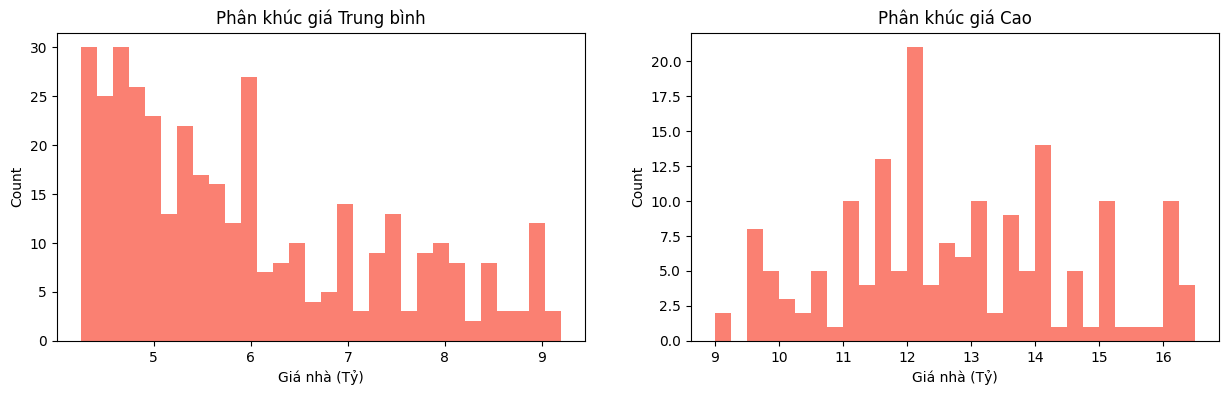

In [30]:
plt.figure(figsize=(15, 4))

check2 = data_with_clusters[data_with_clusters['Clusters'] == 1]
plt.subplot(1,2,1)
plt.hist(check2['Giá nhà (Tỷ)'], bins=30, color='salmon')
plt.xlabel('Giá nhà (Tỷ)')
plt.ylabel("Count")
plt.title("Phân khúc giá Trung bình")

plt.subplot(1,2,2)
check3 = data_with_clusters[data_with_clusters['Clusters'] == 3]
plt.hist(check3['Giá nhà (Tỷ)'], bins=30, color='salmon')
plt.xlabel('Giá nhà (Tỷ)')
plt.ylabel("Count")
plt.title("Phân khúc giá Cao")
plt.show()

Thử các mốc giá từ 9-9.2 để chọn phân khúc giá phù hợp

In [31]:
rs = []
for i in np.arange(9, 9.3, 0.1):
    c1 = check2[check2['Giá nhà (Tỷ)'] > i].shape[0]
    c2 = check3[check3['Giá nhà (Tỷ)'] <= i].shape[0]
    rs.append([i, c1, c2, abs(c1 - c2)])
pd.DataFrame(rs, columns=["Mốc giá", "Số mẫu cụm 1 sẽ mất", "Số mẫu cụm 3 mất", "Độ lệch mẫu"])

,Mốc giá,Số mẫu cụm 1 sẽ mất,Số mẫu cụm 3 mất,Độ lệch mẫu
0,9.0,3,2,1
1,9.1,2,2,0
2,9.2,0,2,2
3,9.3,0,2,2


Chuyển đổi các mẫu giữa 2 cụm 1-3 để chia các phân khúc giá rõ ràng

In [32]:
data_with_clusters.loc[(data_with_clusters['Clusters'] == 1) & (data_with_clusters['Giá nhà (Tỷ)'] > 9.1), 'Clusters'] = 3
data_with_clusters.loc[(data_with_clusters['Clusters'] == 3) & (data_with_clusters['Giá nhà (Tỷ)'] <= 9.1), 'Clusters'] = 1

#### Biểu đồ boxplot theo phân khúc giá sau khi chia phân khúc rõ ràng

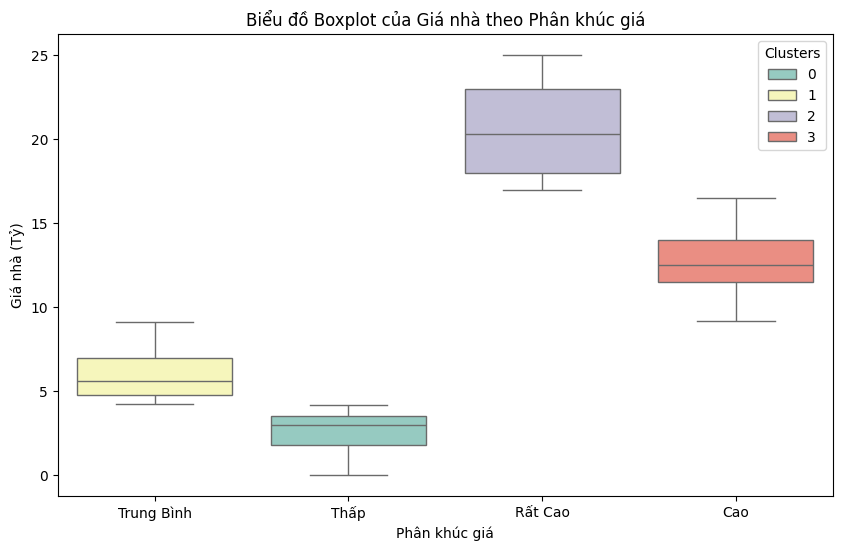

In [33]:
data_with_clusters['Phân khúc giá'] = [mapping_to_label[number] for number in data_with_clusters['Clusters']]
box(data_with_clusters)

In [34]:
mapping_clusters = []
for i in range(4):
    data = data_with_clusters[data_with_clusters['Clusters'] == i]['Giá nhà (Tỷ)']
    min = data.min()
    max = data.max()
    mapping_clusters.append([str(i), min, max, data.shape[0]])
pd.DataFrame(mapping_clusters, columns=["Cụm", "Min", "Max", "Count"]).sort_values('Min')

,Cụm,Min,Max,Count
0,0,0.0048,4.2,631
1,1,4.2500,9.1,375
3,3,9.2000,16.5,170
2,2,17.0000,25.0,65


#### Bỏ 2 cột "Clusters" và "Giá nhà (Tỷ)", xuất file csv

In [35]:
data_with_clusters.drop('Clusters', axis=1, inplace=True)
data_with_clusters.drop('Giá nhà (Tỷ)', axis=1, inplace=True)
data_with_clusters.to_csv("Clustering_train.csv")

### Clustering tập test  

Các phân khúc giá:  
    - Thấp: > 4.2  
    - Trung bình: 4.2 - 9.1  
    - Cao: 9.1 - 16.5  
    - Rất cao: > 16.5  

In [36]:
data = pd.read_csv('FE_data_test.csv')
data.loc[(data['Giá nhà (Tỷ)'] > 16.5), 'Phân khúc giá'] = 'Rất Cao'
data.loc[(data['Giá nhà (Tỷ)'] <= 16.5), 'Phân khúc giá'] = 'Cao'
data.loc[(data['Giá nhà (Tỷ)'] <= 9.1), 'Phân khúc giá'] = 'Trung Bình'
data.loc[(data['Giá nhà (Tỷ)'] <= 4.2), 'Phân khúc giá'] = 'Thấp'
data.drop('Giá nhà (Tỷ)', axis=1, inplace=True)
data.to_csv("Clustering_test.csv")
data

,Khu vực,Mô tả vị trí,Diện tích (m^2),Mặt tiền (m),Số phòng ngủ,WC,Phân khúc giá
0,0.028834,-0.917999,-1.433770,1.597921,-2.096746,-1.995583,Thấp
1,1.687041,1.878484,1.726051,1.597921,0.477551,0.448552,Cao
2,1.687041,-1.532627,0.104348,-0.251199,-0.406482,-0.161430,Trung Bình
3,0.614493,0.240213,-0.813867,0.344369,-0.406482,-0.161430,Cao
4,0.028834,1.878484,1.467965,1.597921,0.477551,0.448552,Cao
...,...,...,...,...,...,...,...
185,0.028834,0.240213,0.862329,-0.251199,1.590378,1.765482,Rất Cao
186,0.028834,1.878484,1.726051,1.597921,0.477551,1.386842,Rất Cao
187,0.028834,0.240213,-0.192512,-1.102826,0.477551,-0.933671,Trung Bình
188,0.614493,0.240213,0.862329,0.344369,1.242140,0.954186,Trung Bình
